In [1664]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [1665]:
def cat_codes(df, column, new_column):
    for column in df.columns:
        if df[column].dtype == 'category':
            df[new_column] = df[column].cat.codes
    return df

def int_values(df, column_name):
    df[column_name] = abs(df[column_name].round().astype(int))
    return df

In [1666]:
shows = pd.read_csv("YFBP all eps.csv")

In [1667]:
front_half_shows = shows.loc[shows["Episode"] >= 50]
back_half_shows = shows.loc[shows["Episode"] <= 51]

In [1668]:
views = shows.set_index("Views").sort_index(ascending=False)
views

,Episode,Title,Length,Ep_Set,Guest
Views,,,,,
10555,100,MASTERPLAN,81,10,Y
6520,31,BABY,29,4,Y
5846,104,BEAT THE SUN,53,11,N
5760,108,BIG ZOO,45,11,N
5755,103,Landlord,61,11,N
...,...,...,...,...,...
673,94,Tory Lanez: What Really Happened?,56,10,N
632,97,Alex Murdaugh Pt. II,37,10,N
461,86,Low Vibrations,25,9,N


In [1669]:
shows[["Views"]].sum()

Views    213366
dtype: int64

In [1670]:
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Episode  100 non-null    int64 
 1   Title    100 non-null    object
 2   Length   100 non-null    int64 
 3   Views    100 non-null    int64 
 4   Ep_Set   100 non-null    int64 
 5   Guest    100 non-null    object
dtypes: int64(4), object(2)
memory usage: 4.8+ KB


In [1671]:
shows.describe()

,Episode,Length,Views,Ep_Set
count,100.000000,100.000000,100.000000,100.000000
mean,57.000000,31.290000,2133.660000,6.140000
std,29.669901,12.094155,1531.650217,2.981492
min,7.000000,11.000000,65.000000,1.000000
25%,31.750000,24.000000,1378.500000,4.000000
50%,56.500000,28.000000,1789.500000,6.000000
75%,81.750000,36.000000,2289.500000,9.000000
max,108.000000,81.000000,10555.000000,11.000000


In [1672]:
shows[shows['Views'] >= 5000]

,Episode,Title,Length,Views,Ep_Set,Guest
24,31,BABY,29,6520,4,Y
91,100,MASTERPLAN,81,10555,10,Y
92,101,Unmasking Controversy,42,5213,11,N
93,102,DUI/ Brawls/ & Backlash,66,5293,11,Y
94,103,Landlord,61,5755,11,N
95,104,BEAT THE SUN,53,5846,11,N
97,106,We Might Get Hit With The R.I.C.O Pt. II,42,5404,11,N
99,108,BIG ZOO,45,5760,11,N


In [1673]:
shows.groupby("Ep_Set")["Views"].sum()

Ep_Set
1      9794
2     15546
3     21265
4     23722
5     18372
6     18145
7     22182
8     17302
9      8233
10    16912
11    41893
Name: Views, dtype: int64

In [1674]:
shows.isnull().sum()

Episode    0
Title      0
Length     0
Views      0
Ep_Set     0
Guest      0
dtype: int64

In [1675]:
first = np.quantile(shows['Views'], .25).round().astype(int)
second = np.quantile(shows['Views'], .50).round().astype(int)
third = np.quantile(shows['Views'], .75).round().astype(int)
max = shows['Views'].max()
[first, second, third, max]

[1378, 1790, 2290, 10555]

In [1676]:
colors, sizes, quantile = [], [], []
# Iterate over rows of shows
for lab, row in shows.iterrows():
    if row['Views'] <= first:
        colors.append("red")
        sizes.append(25)
        quantile.append("1st")
    elif third > row['Views'] <= second:
        colors.append("blue")
        sizes.append(50)
        quantile.append("2nd")
    elif max > row['Views'] <= third:
        colors.append("green")
        sizes.append(75)
        quantile.append("3rd")
    elif row['Views'] == max:
        colors.append("gold")
        sizes.append(100)
        quantile.append("max")
    else:
        colors.append("green")
        sizes.append(75)
        quantile.append("4th")

shows['visual_color'] = colors
shows['visual_size'] = sizes
shows['views_quantile'] = quantile

shows.views_quantile.value_counts()

views_quantile
3rd    25
1st    25
2nd    25
4th    24
max     1
Name: count, dtype: int64

<Axes: xlabel='Episode', ylabel='Views'>

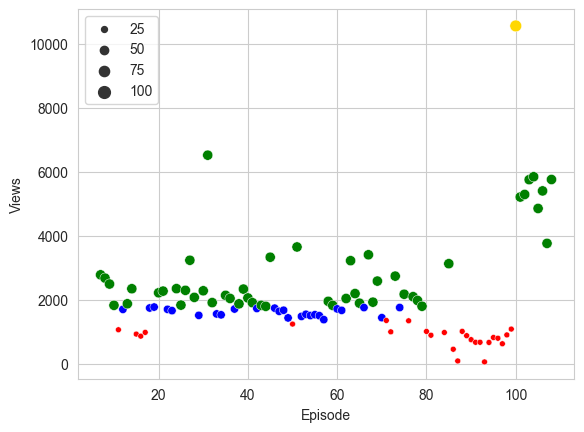

In [1677]:
sns.scatterplot(x="Episode", y="Views", data=shows, color=colors, size=sizes)

In [1678]:
shows.views_quantile = shows.views_quantile.astype('category')
shows.Guest = shows.Guest.astype('category')
shows.Title = shows.Title.astype('string')
shows['title_length'] = shows['Title'].str.len().astype('int')

In [1679]:
shows = cat_codes(shows, 'Guest', 'guest_codes')
shows = cat_codes(shows, 'views_quantile', 'quantile_codes')
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Episode         100 non-null    int64   
 1   Title           100 non-null    string  
 2   Length          100 non-null    int64   
 3   Views           100 non-null    int64   
 4   Ep_Set          100 non-null    int64   
 5   Guest           100 non-null    category
 6   visual_color    100 non-null    object  
 7   visual_size     100 non-null    int64   
 8   views_quantile  100 non-null    category
 9   title_length    100 non-null    int32   
 10  guest_codes     100 non-null    int8    
 11  quantile_codes  100 non-null    int8    
dtypes: category(2), int32(1), int64(5), int8(2), object(1), string(1)
memory usage: 6.7+ KB


In [1680]:
samples = shows.sample(frac=1/4, replace=False)
samples

,Episode,Title,Length,Views,Ep_Set,Guest,visual_color,visual_size,views_quantile,title_length,guest_codes,quantile_codes
89,98,BEEF ALERT!!!!!!!!!,67,908,10,Y,red,25,1st,19,0,0
86,95,Netflix Dead?,53,828,10,N,red,25,1st,13,0,0
87,96,Scandals + Murders = Alex Murdaugh Pt. I,33,804,10,N,red,25,1st,40,0,0
49,56,STRIP CLUB,27,1509,6,N,blue,50,2nd,10,1,1
73,80,Grand Slams,34,1017,8,N,red,25,1st,11,0,0
80,89,Go All The Way Pt. II,17,884,9,N,red,25,1st,21,0,0
24,31,BABY,29,6520,4,Y,green,75,4th,4,3,3
28,35,Dine and Dash,23,2144,4,N,green,75,3rd,13,2,2
85,94,Tory Lanez: What Really Happened?,56,673,10,N,red,25,1st,33,0,0
65,72,Casket Fresh,51,1004,8,N,red,25,1st,12,0,0


In [1681]:
from statsmodels.formula.api import ols
mdl_views_v_guests = ols('Views ~ title_length', data=samples).fit()
mdl_views_v_guests.params

Intercept       2867.416196
title_length     -66.351426
dtype: float64

In [1682]:
explanatory_data = pd.DataFrame({'title_length': np.arange(0, len(samples))})

In [1683]:
prediction_data = explanatory_data.assign(Views = mdl_views_v_guests.predict(explanatory_data))
prediction_data = int_values(prediction_data, 'Views')
prediction_data.Views

0     2867
1     2801
2     2735
3     2668
4     2602
5     2536
6     2469
7     2403
8     2337
9     2270
10    2204
11    2138
12    2071
13    2005
14    1938
15    1872
16    1806
17    1739
18    1673
19    1607
20    1540
21    1474
22    1408
23    1341
24    1275
Name: Views, dtype: int32

In [1684]:
prediction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   title_length  25 non-null     int32
 1   Views         25 non-null     int32
dtypes: int32(2)
memory usage: 328.0 bytes


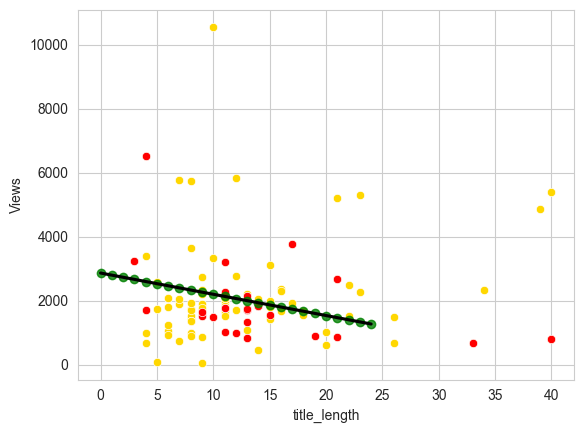

In [1685]:
fig = plt.figure()
sns.set_style('whitegrid')
sns.scatterplot(x="title_length", y="Views", data=shows, color='gold')

sns.scatterplot(x="title_length", y="Views", data=samples, color='red')


sns.regplot(x="title_length", y="Views", data=prediction_data, ci=0.95, line_kws={"color": "black"}, color='green')
plt.legend
plt.show()